In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv
/kaggle/input/boston-dataser/housing.csv


In [10]:
import os

# List all files in the dataset directory
dataset_path = "/kaggle/input/boston-dataser"
print(os.listdir(dataset_path))


['housing.csv']


In [13]:
import pandas as pd

# Load the space-separated data without headers
file_path = "/kaggle/input/boston-dataser/housing.csv"
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Manually assign column names (standard Boston dataset columns)
df.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Show the first few rows
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


/tmp/ipykernel_31/1208423762.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop("MEDV", axis=1).values  # Features
y = df["MEDV"].values               # Target (House prices)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (standard scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers

# Build the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-05 14:25:21.312445: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 621.4572 - mae: 23.0470 - val_loss: 478.6147 - val_mae: 20.2943
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 481.9171 - mae: 20.1340 - val_loss: 363.6053 - val_mae: 17.3426
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 349.7513 - mae: 16.6244 - val_loss: 201.0537 - val_mae: 12.4126
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192.9105 - mae: 11.5335 - val_loss: 72.7801 - val_mae: 6.4028
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.0338 - mae: 6.9869 - val_loss: 40.4726 - val_mae: 4.4604
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8792 - mae: 5.3839 - val_loss: 31.3743 - val_mae: 3.8371
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.0688 - mae: 4.2566 - val_loss: 28.8863 - val_mae: 3.6652
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.8155 - mae: 3.7385 - val_loss: 27.1827 - val_mae: 3.5718
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9981 - mae: 2.1290 
Test MAE: 2.29


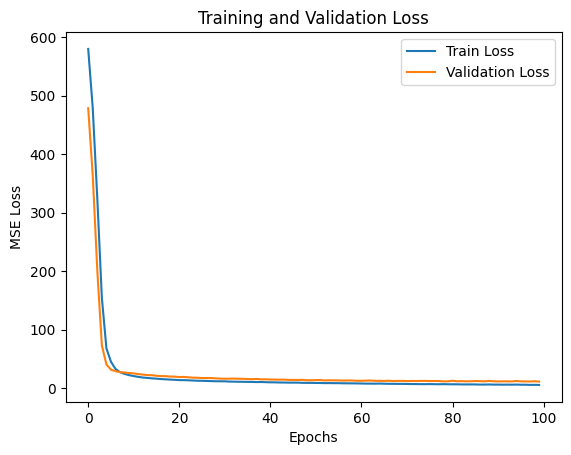

In [16]:
import matplotlib.pyplot as plt

# Evaluate on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


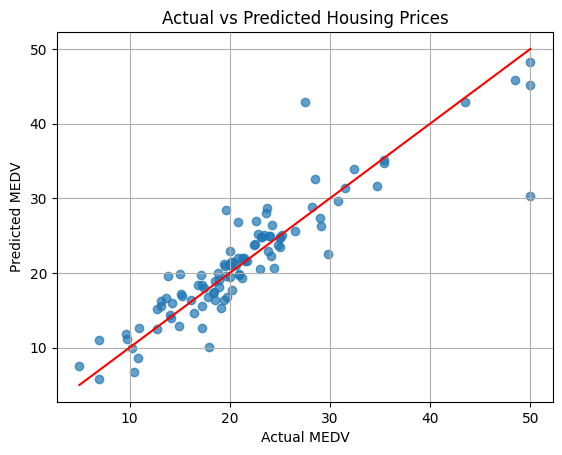

In [17]:
# Predict on test set
y_pred = model.predict(X_test).flatten()

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Housing Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')  # Perfect prediction line
plt.grid(True)
plt.show()
